<a href="https://colab.research.google.com/github/SandaMaster/data-science/blob/master/Kopia_notatnika_ML_workshop_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning -- 3h początek

Daniel Mika

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
oecd_bli = pd.read_csv("/gdrive/My Drive/Colab Notebooks/ML-workshop-01/oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,21.0,5.0,80.5,6.9,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,21.0,6.4,81.5,7.3,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [ ]:
oecd_bli.rename(columns={"Life satisfaction": "Satysfakcja z życia"}, inplace=True)
oecd_bli["Satysfakcja z życia"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Satysfakcja z życia, dtype: float64

In [ ]:
gdp_per_capita = pd.read_csv("/gdrive/My Drive/Colab Notebooks/ML-workshop-01/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "PKB per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="PKB per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Satysfakcja z życia,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,21.0,4.9,74.6,6.7,0.08,16193.0,77.0,1.0,66.0,417.0,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.70,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.10,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,21.0,7.3,76.9,5.8,3.77,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,18.0,4.4,78.9,6.7,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,26.0,5.5,76.2,6.1,9.46,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,26.0,4.1,78.2,6.5,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [ ]:
full_country_stats[["PKB per capita", 'Satysfakcja z życia']].loc["United States"]

PKB per capita         55805.204
Satysfakcja z życia        7.200
Name: United States, dtype: float64

In [ ]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]   # operujemy tylko na części danych 
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[keep_indices]
missing_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[remove_indices]

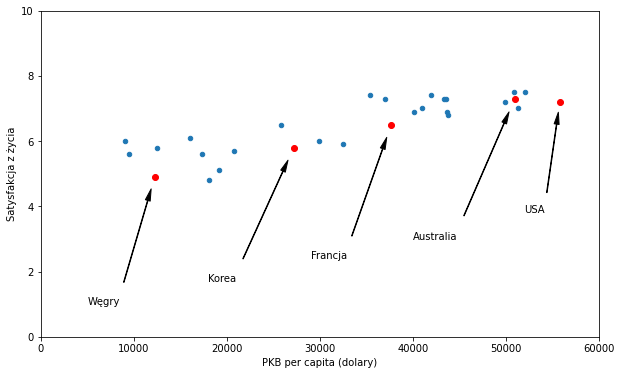

In [ ]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "USA" if country == "United States" else country
    country = "Węgry" if country == "Hungary" else country
    country = "Francja" if country == "France" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("PKB per capita (dolary)")
#save_fig('r_1_17')
plt.show()

In [ ]:
# Przygotowuje dane

X = np.c_[sample_data["PKB per capita"]]
y = np.c_[sample_data["Satysfakcja z życia"]]


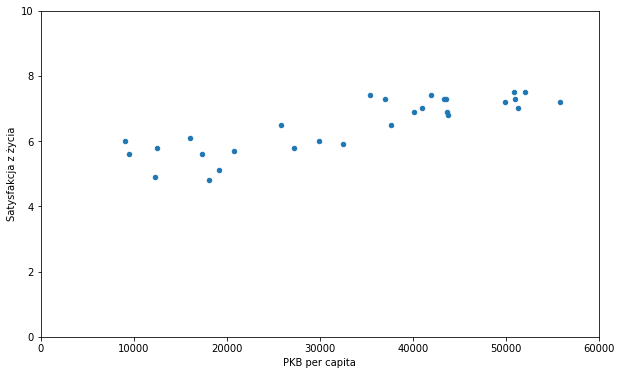

In [ ]:
# Wizualizuje dane

sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.axis([0, 60000, 0, 10])
plt.show()

In [ ]:
# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

In [ ]:
# Uczy dane
model.fit(X, y)

LinearRegression()

In [ ]:
# Oblicza prognozy dla Cypru
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) 

[[5.96242338]]


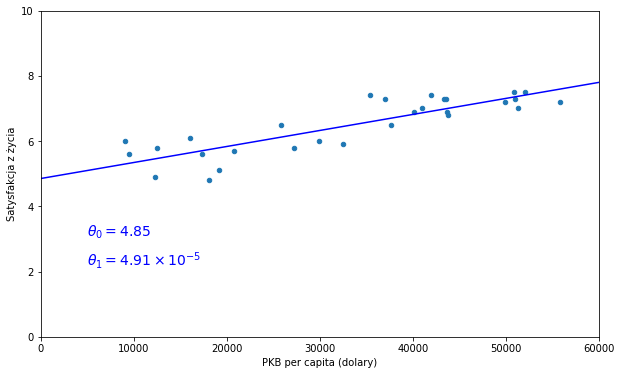

t1 =  4.911544589158484e-05
t0 =  4.853052800266436


In [ ]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z życia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]  #współczynnik funkcji liniowej
t0, t1
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.xlabel("PKB per capita (dolary)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('r_1_19')
plt.show()
print("t1 = ", t1)
print("t0 = ", t0)

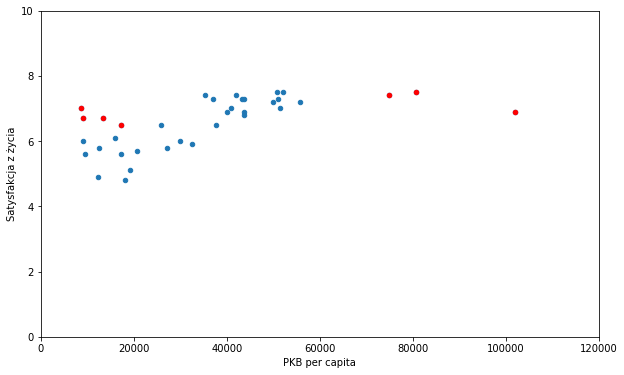

In [ ]:
# Wizualizuje dane

ax = full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
missing_data.plot(ax=ax, kind='scatter', x="PKB per capita", y='Satysfakcja z życia', color="red" )
plt.axis([0, 120000, 0, 10])
plt.show()

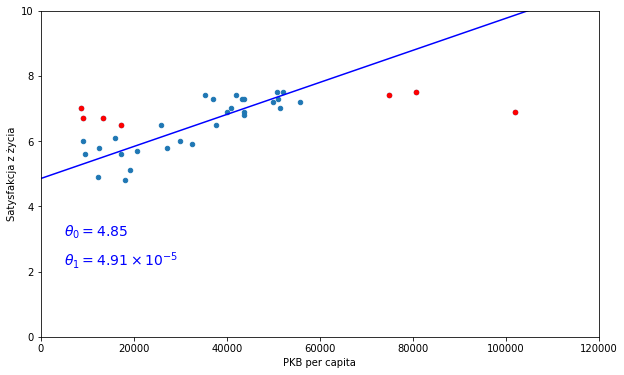

In [ ]:
ax = full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
missing_data.plot(ax=ax, kind='scatter', x="PKB per capita", y='Satysfakcja z życia', color="red" )
plt.axis([0, 120000, 0, 10])

X=np.linspace(0, 120000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

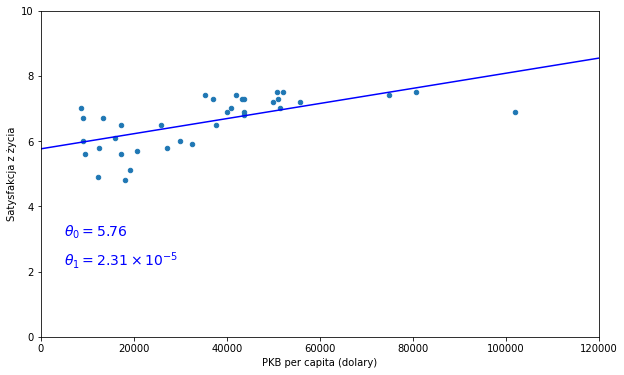

t1 =  2.3177337047396075e-05
t0 =  5.763029861307918


In [ ]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[full_country_stats["PKB per capita"]]
ysample = np.c_[full_country_stats["Satysfakcja z życia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]  #współczynnik funkcji liniowej
t0, t1
full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.xlabel("PKB per capita (dolary)")
plt.axis([0, 120000, 0, 10])
X=np.linspace(0, 120000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.76$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 2.31 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('r_1_19')
plt.show()
print("t1 = ", t1)
print("t0 = ", t0)

# Nie reprezentatywne dane

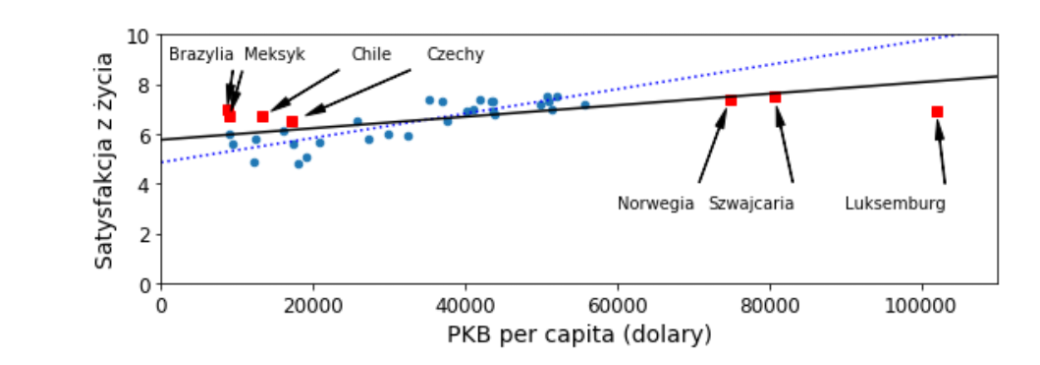